In [1]:
import numpy as np 
import pandas as pd 
import math

import matplotlib.pyplot as plt 
from matplotlib import style
# style.use('fivethirtyeight')
style.use('ggplot')

import plotly.express as px
import plotly.graph_objects as go

# Data Visualization
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

NOte : Execute below cells only if running on google colab for getting the dataset

In [2]:
!gdown --id 192h8LDFatS7r8GHI6trlegkheGKgBVdE --output CleanDF.csv

Downloading...
From: https://drive.google.com/uc?id=192h8LDFatS7r8GHI6trlegkheGKgBVdE
To: /content/CleanDF.csv
100% 747k/747k [00:00<00:00, 47.1MB/s]


In [3]:
df = pd.read_csv('CleanDF.csv')
df.head(3)

,title_translated,listed_price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_product_quality,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,has_urgency_banner,urgency_text,merchant_rating_count,merchant_rating,merchant_id,product_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,"('summer', 'fashion', 'womenunderwearsuit', 'p...",white,M,50,4,34,1,QuantityLimited,568,4.128521,595097d6a26f6e070cb878d1,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,"('mini', 'womens dresses', 'summer', 'patchwor...",green,XS,50,2,41,1,QuantityLimited,17752,3.899673,56458aa03a698c35c9050988,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.0,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,"('summer', 'cardigan', 'women beachwear', 'chi...",others,XS,1,3,36,1,QuantityLimited,295,3.989831,5d464a1ffdf7bc44ee933c65,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a


In [4]:
df.dtypes[df.dtypes == 'object']

title_translated             object
tags                         object
product_color                object
product_variation_size_id    object
urgency_text                 object
merchant_id                  object
product_picture              object
product_id                   object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title_translated             1341 non-null   object 
 1   listed_price                 1341 non-null   float64
 2   retail_price                 1341 non-null   int64  
 3   units_sold                   1341 non-null   int64  
 4   uses_ad_boosts               1341 non-null   int64  
 5   rating                       1341 non-null   float64
 6   rating_count                 1341 non-null   int64  
 7   rating_five_count            1341 non-null   float64
 8   rating_four_count            1341 non-null   float64
 9   rating_three_count           1341 non-null   float64
 10  rating_two_count             1341 non-null   float64
 11  rating_one_count             1341 non-null   float64
 12  badge_product_quality        1341 non-null   int64  
 13  tags              

- lets import the CSV file that has all the unique categories of tags sorted by count. here The aim is to find out the percentage of total number of tags available for a particular product. then our new feature will be 'tags_percentage'.

- The reason behind engineering this feature is that the more number of tags a product has, the more it will turn up in searches. The probability of its units being sold more in number will be high.

- We will drop the 'tags' feature thereafter because we do not need it for the model. 

In [7]:
!gdown --id 1SuPa3zvm24oTzbqQkhVdNirCkIHFKJI2 --output unique-categories.sorted-by-count.csv

collect_tags = pd.read_csv('unique-categories.sorted-by-count.csv')
print('Total number of tags: ', collect_tags.shape[0])

Downloading...
From: https://drive.google.com/uc?id=1SuPa3zvm24oTzbqQkhVdNirCkIHFKJI2
To: /content/unique-categories.sorted-by-count.csv
100% 39.4k/39.4k [00:00<00:00, 52.4MB/s]
Total number of tags:  2620


In [8]:
# Return percentage of tags present for a product

def tag_number(tags):
    ls = tags.split(',')
    return len(ls)/collect_tags.shape[0]

In [9]:
df['tags_percentage'] = df['tags'].apply(tag_number)

In [10]:
df.drop(labels = ['tags'], axis=1, inplace=True)

#### Correlation between features

lets check for correlation of all features with the number of units sold. 

For the two categorical variables (product colour and variation size and origin country) however, we will do a separate check of correlation (using the one hot encoded format) with the units sold. This has been done because it will be difficult to visualise efficiently otherwise. 

In [11]:
# product color
dummies_color = pd.get_dummies(df['product_color'], drop_first=True) # give us the one hot ecoded features
dummies_color.drop(labels = 'others', axis=1, inplace=True) # remove the 'others' feature as n-1 encoded features represents n features

In [12]:
# product variation size id
dummies_variation = pd.get_dummies(df['product_variation_size_id'])
dummies_variation.drop(labels = ['Others'], axis = 1, inplace=True)

### One hot encoding

We will change our categorical variables to one hot encoding format. 

In [13]:
# concatenating all the one hot encoded features for the three categorical variables above

feat_onehot = pd.concat([dummies_color, dummies_variation, df['units_sold']], axis=1)
feat_onehot.head(1)

,blue,brown,green,grey,orange,pink,purple,red,white,yellow,L,M,S,XL,XS,XXL,XXS,units_sold
0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,100


In [14]:
feat_onehot_corr = feat_onehot.corr()

feat_onehot_corr['units_sold'].sort_values(ascending=False)

units_sold    1.000000
M             0.093421
S             0.064241
XL            0.044004
grey          0.038579
purple        0.036645
orange        0.025344
L             0.024548
white         0.009503
green        -0.013083
brown        -0.015332
XXL          -0.024568
blue         -0.026632
red          -0.031285
pink         -0.044092
yellow       -0.053483
XXS          -0.067780
XS           -0.109748
Name: units_sold, dtype: float64

* From the above result we can safely say that the dependency of units sold on the product color and variation size is very unlikely. 
* For the same reason, we will DROP these features. 

In [15]:
df.drop(labels = ['product_color', 'product_variation_size_id'], 
           axis=1, 
           inplace=True)

In [16]:
df.drop(labels = ['title_translated', 'product_picture', 'product_id', 'merchant_id', 'urgency_text', 'rating_count'], 
           axis=1, 
           inplace=True)

### The correlation between the rest of the features and units of the product sold

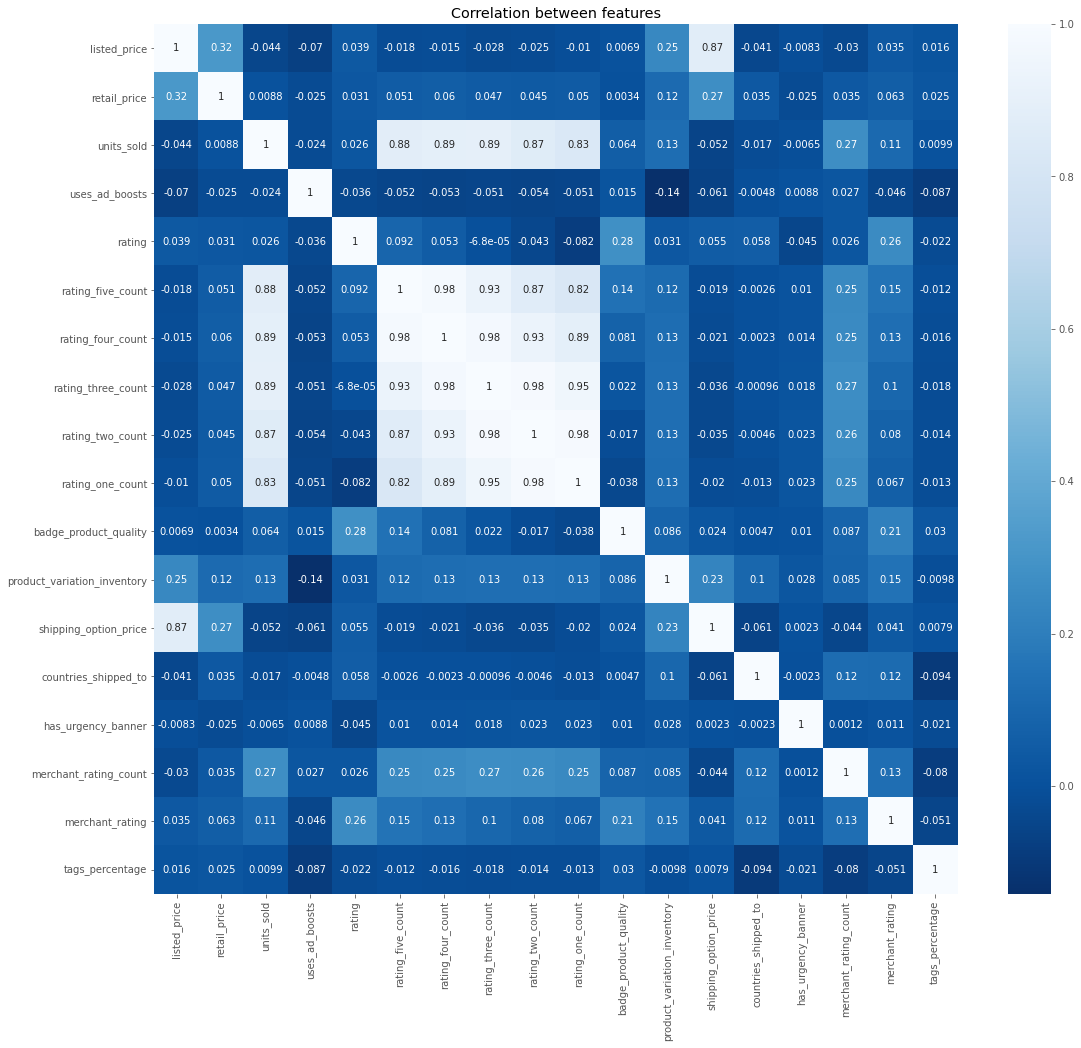

In [17]:
sales_corr = df.corr()

plt.figure(figsize = (18, 16))
sns.heatmap(sales_corr, annot=True, cmap='Blues_r')
plt.title('Correlation between features')
plt.show()

In [19]:
def get_pairs(df, trgt_col):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        pairs_to_drop.add((trgt_col, cols[i]))
    return pairs_to_drop

def get_strong_correlations(df, n=10):
    au_corr = df.corr().unstack()
    labels_to_drop = get_pairs(df, 'units_sold')
    au_corr_desc = au_corr['units_sold'].sort_values(ascending=False)
    au_corr_asc = au_corr['units_sold'].sort_values(ascending=True)
    return au_corr_desc[0:n], au_corr_asc[0:n]

au_corr_desc, au_corr_asc = get_strong_correlations(df, 15)

print("Strong Correlations")
print("Positive Correlations")
print(au_corr_desc)
print(au_corr_desc.index)
print('-----------------------------')
print("Negative Correlations")
print(au_corr_asc)

Strong Correlations
Positive Correlations
units_sold                     1.000000
rating_three_count             0.893082
rating_four_count              0.891362
rating_five_count              0.875780
rating_two_count               0.865060
rating_one_count               0.832029
merchant_rating_count          0.272979
product_variation_inventory    0.127573
merchant_rating                0.110917
badge_product_quality          0.063519
rating                         0.026177
tags_percentage                0.009881
retail_price                   0.008808
has_urgency_banner            -0.006474
countries_shipped_to          -0.017163
dtype: float64
Index(['units_sold', 'rating_three_count', 'rating_four_count',
       'rating_five_count', 'rating_two_count', 'rating_one_count',
       'merchant_rating_count', 'product_variation_inventory',
       'merchant_rating', 'badge_product_quality', 'rating', 'tags_percentage',
       'retail_price', 'has_urgency_banner', 'countries_shipped_to']

* We can see above the correlation all features hold with the units sold. The method for correlation is *pearson*.

* We will use the **SelectKBest method** to capture the best features for the model. 

## Feature Selection

In [20]:
# separating the independent and dependent variables

y = df['units_sold']
X = df.drop(labels = ['units_sold'], axis = 1)
print("Shape of X is {} and that of y is {}".format(X.shape, y.shape))

Shape of X is (1341, 17) and that of y is (1341,)


In [21]:
# Splitting the dataset 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of training set  (1005, 17)
Shape of test set  (336, 17)


### SelectKBest

* Selects features according to the k highest scores.

* Scoring function used here is Mutual Info Regression

### Scoring Function: Mutual Info Regression

* We could have used the default scoring function: f_regression but that captures linear dependencies better.

* mutual_info_regression can capture any type of dependency between variables which is what we would need here. Check out the comparison [here](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html).

* **Mutual Information Regression**: 

    * Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

    * The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances. 
    
Source: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

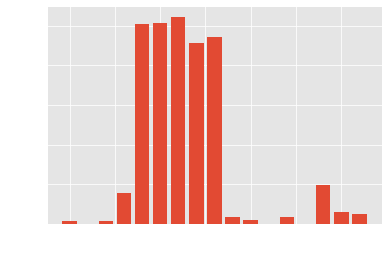

In [23]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.tick_params(color='white', labelcolor='white')
plt.xlabel('Features', color='white')
plt.ylabel('Score of Features', color='white')
plt.show()

In [24]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k=8)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [25]:
# Selecting features

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

print('Shape of Training set with the best features: ', X_train_fs.shape)

Shape of Training set with the best features:  (1005, 8)


In [26]:
cols = fs.get_support(indices=True)

print('Best columns that we are using for our model\n')
for i in cols:
    print (df.columns[i])

Best columns that we are using for our model

uses_ad_boosts
rating
rating_five_count
rating_four_count
rating_three_count
rating_two_count
has_urgency_banner
merchant_rating_count


### Regression Models

In [27]:
# Importing models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Cross validation
from sklearn.model_selection import cross_val_score

In [28]:
regressors = [LinearRegression(),
             DecisionTreeRegressor(random_state=1),
             RandomForestRegressor(n_estimators = 10, random_state=1)]

df = pd.DataFrame(columns = ['Name', 'Train Score', 'Test Score', 'Mean Absolute Error', 'Mean Squared Error', 
                             'Cross Validation Score (Mean Accuracy)', 'R2 Score'])

In [29]:
for regressor in regressors:
    regressor.fit(X_train_fs, y_train)
    y_pred = regressor.predict(X_test_fs)
    
    # print classifier name
    s = str(type(regressor)).split('.')[-1][:-2]
    
    # Train Score
    train = regressor.score(X_train_fs, y_train)
    
    # Test Score
    test = regressor.score(X_test_fs, y_test)
    
    # MAE score
    mae = mean_absolute_error(y_test, y_pred)
    
    # MSE Score
    mse = mean_squared_error(y_test, y_pred)
    
    accuracy = cross_val_score(estimator = regressor, X = X_train_fs, y = y_train, cv=10)
    cv = accuracy.mean()*100
    
    r2 = r2_score(y_test, y_pred)
    
    df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae, 
                    'Mean Squared Error': mse, 'Cross Validation Score (Mean Accuracy)': cv,
                   'R2 Score': r2},
                  ignore_index=True)
    
df

,Name,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,Cross Validation Score (Mean Accuracy),R2 Score
0,LinearRegression,0.811489,0.799702,2153.450794,2.439599e+07,75.005102,0.799702
1,DecisionTreeRegressor,1.000000,0.650819,1990.827381,4.252969e+07,64.652148,0.650819
2,RandomForestRegressor,0.960188,0.779113,2073.082143,2.690363e+07,73.567409,0.779113


In [30]:
# Making Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 3)
X_train_poly = poly_reg.fit_transform(X_train_fs)
X_test_poly = poly_reg.fit_transform(X_test_fs)

# Fitt PolyReg to training set
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

# Predicting test values
y_pred = regressor.predict(X_test_poly)

df = df.append({'Name': str(type(regressor)).split('.')[-1][:-2] + ' (Poly)', 
                'Train Score': regressor.score(X_train_poly, y_train), 
                'Test Score': regressor.score(X_test_poly, y_test), 
                'Mean Absolute Error': mean_absolute_error(y_test, y_pred), 
                'Mean Squared Error': mean_squared_error(y_test, y_pred), 
                'Cross Validation Score (Mean Accuracy)': cross_val_score(estimator = regressor, X = X_train_fs, y = y_train, cv=10).mean()*100,
                'R2 Score': r2_score(y_test, y_pred)},
                  ignore_index=True)

In [31]:
# Scaling
from sklearn.preprocessing import StandardScaler

# Applying feature scaling for this
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_fs)
X_test_sc = sc.fit_transform(X_test_fs)

regressor = SVR(kernel='rbf')
regressor.fit(X_train_sc, y_train)

# Predicting test values
y_pred = regressor.predict(X_test_sc)

df = df.append({'Name': str(type(regressor)).split('.')[-1][:-2], 
                'Train Score': regressor.score(X_train_sc, y_train), 
                'Test Score': regressor.score(X_test_sc, y_test), 
                'Mean Absolute Error': mean_absolute_error(y_test, y_pred), 
                'Mean Squared Error': mean_squared_error(y_test, y_pred), 
                'Cross Validation Score (Mean Accuracy)': cross_val_score(estimator = regressor, X = X_train_sc, y = y_train, cv=10).mean()*100,
                'R2 Score': r2_score(y_test, y_pred)},
                  ignore_index=True)

df

,Name,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,Cross Validation Score (Mean Accuracy),R2 Score
0,LinearRegression,0.811489,0.799702,2153.450794,2.439599e+07,75.005102,0.799702
1,DecisionTreeRegressor,1.000000,0.650819,1990.827381,4.252969e+07,64.652148,0.650819
2,RandomForestRegressor,0.960188,0.779113,2073.082143,2.690363e+07,73.567409,0.779113
3,LinearRegression (Poly),0.948472,-44.857599,8125.892172,5.585376e+09,75.005102,-44.857599
4,SVR,-0.132196,-0.171835,5196.946585,1.427275e+08,-16.629011,-0.171835


## GridSearchCV

We will perform GridSearch on Random Forest Regression that has already given us best results out of the pool of models we tried.

In [32]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(random_state=1)

param_grid = { 
    'n_estimators': np.arange(4, 30, 2),
    'max_depth' : [4,5,6,7,8],
}

In [33]:
CV_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV_reg.fit(X_train_fs, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [34]:
CV_reg.best_params_

{'max_depth': 5, 'n_estimators': 26}

In [35]:
regressor = RandomForestRegressor(n_estimators=26, random_state=1, max_depth=5)

regressor.fit(X_train_fs, y_train)

# Predicting test values
y_pred = regressor.predict(X_test_fs)

df = df.append({'Name': str(type(regressor)).split('.')[-1][:-2] + ' (after GridSearchCV)', 
                'Train Score': regressor.score(X_train_fs, y_train), 
                'Test Score': regressor.score(X_test_fs, y_test), 
                'Mean Absolute Error': mean_absolute_error(y_test, y_pred), 
                'Mean Squared Error': mean_squared_error(y_test, y_pred), 
                'Cross Validation Score (Mean Accuracy)': cross_val_score(estimator = regressor, X = X_train_fs, y = y_train, cv=10).mean()*100,
                'R2 Score': r2_score(y_test, y_pred)},
                  ignore_index=True)

**MODEL BOOSTING:** We have used VotingRegressor to boost our results. 

VotingRegressor: A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction. Click [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html) for more details.

The voting regressor uses *linear regressor* and the best possible *random forest regressor* to give predictions.

In [36]:
from sklearn.ensemble import VotingRegressor

regressor = VotingRegressor([('lr',LinearRegression()), ('rf', RandomForestRegressor(n_estimators=18, random_state=1, max_depth=4))])

regressor.fit(X_train_fs, y_train)

# Predicting test values
y_pred = regressor.predict(X_test_fs)

df = df.append({'Name': str(type(regressor)).split('.')[-1][:-2], 
                'Train Score': regressor.score(X_train_fs, y_train), 
                'Test Score': regressor.score(X_test_fs, y_test), 
                'Mean Absolute Error': mean_absolute_error(y_test, y_pred), 
                'Mean Squared Error': mean_squared_error(y_test, y_pred), 
                'Cross Validation Score (Mean Accuracy)': cross_val_score(estimator = regressor, X = X_train_fs, y = y_train, cv=10).mean()*100,
                'R2 Score': r2_score(y_test, y_pred)},
                  ignore_index=True)

df

,Name,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,Cross Validation Score (Mean Accuracy),R2 Score
0,LinearRegression,0.811489,0.799702,2153.450794,2.439599e+07,75.005102,0.799702
1,DecisionTreeRegressor,1.000000,0.650819,1990.827381,4.252969e+07,64.652148,0.650819
2,RandomForestRegressor,0.960188,0.779113,2073.082143,2.690363e+07,73.567409,0.779113
3,LinearRegression (Poly),0.948472,-44.857599,8125.892172,5.585376e+09,75.005102,-44.857599
4,SVR,-0.132196,-0.171835,5196.946585,1.427275e+08,-16.629011,-0.171835
5,RandomForestRegressor (after GridSearchCV),0.928893,0.820999,1923.118525,2.180200e+07,76.516459,0.820999
6,VotingRegressor,0.880868,0.837355,1936.436505,1.980990e+07,78.786802,0.837355
